# Text analysis
This project is done to extract the key word which is most used in linkedin post for the analysis purpose. The process includes the cleaning of nested data along with the visualization tools.  

In [1]:

import pandas as pd
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Käyttäjä\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
data = pd.read_json("linkedin_post.json")

<AxesSubplot:>

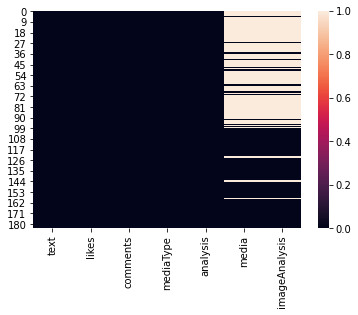

In [3]:
sns.heatmap(data.isnull())

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           184 non-null    object
 1   likes          184 non-null    int64 
 2   comments       184 non-null    int64 
 3   mediaType      184 non-null    object
 4   analysis       184 non-null    object
 5   media          95 non-null     object
 6   imageAnalysis  95 non-null     object
dtypes: int64(2), object(5)
memory usage: 10.2+ KB


In [5]:
data.head()

,text,likes,comments,mediaType,analysis,media,imageAnalysis
0,“It doesn’t really work with our brand to ship...,52,1,video,"{'usage': {'text_units': 1, 'text_characters':...",NaN,NaN
1,Our paper cup material is made from sustainabl...,261,2,video,"{'usage': {'text_units': 1, 'text_characters':...",NaN,NaN
2,Our purpose is to advance the renewable materi...,245,3,video,"{'usage': {'text_units': 1, 'text_characters':...",NaN,NaN
3,Making a change into more sustainable options ...,320,8,video,"{'usage': {'text_units': 1, 'text_characters':...",NaN,NaN
4,Paper bags can be stronger and more resilient ...,204,2,video,"{'usage': {'text_units': 1, 'text_characters':...",NaN,NaN


In [6]:
data_normalize1= pd.json_normalize(data.analysis)
data_normalize1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   relations                         180 non-null    object 
 1   language                          184 non-null    object 
 2   keywords                          184 non-null    object 
 3   entities                          180 non-null    object 
 4   concepts                          180 non-null    object 
 5   categories                        180 non-null    object 
 6   usage.text_units                  184 non-null    int64  
 7   usage.text_characters             184 non-null    int64  
 8   usage.features                    184 non-null    int64  
 9   sentiment.document.score          180 non-null    float64
 10  sentiment.document.label          180 non-null    object 
 11  emotion.document.emotion.sadness  180 non-null    float64
 12  emotion.

In [7]:
pd.json_normalize(data_normalize1.keywords[0])

,text,relevance,count
0,Stora Enso’s design team,0.817839,1
1,Melker of Sweden,0.681049,1
2,outdoor hardware company,0.680909,1
3,Emil Gyllenberg,0.674343,1
4,fossil plastic,0.584523,1
5,paddle,0.578182,1
6,brand,0.563556,1
7,way,0.561776,1
8,industry,0.512980,1
9,paddle box,0.486426,1


In [8]:
pd.json_normalize(data_normalize1[:2].relations[1])

,type,sentence,score,arguments
0,agentOf,We are working towards the EU Action Plan for ...,0.600515,"[{'text': 'EU', 'location': [197, 199], 'entit..."


In [9]:
relations_df = pd.DataFrame();
for i in range(len(data_normalize1.relations)):
    df = pd.DataFrame(data_normalize1.relations[i]);
    df_ex = relations_df.append(df, ignore_index=True);
    print(df_ex);
    print("----------------------------------------------------");
    print("------------------", i);

        type                                           sentence     score  \
0    agentOf  "It doesn't really work with our brand to ship...  0.956902   
1  residesIn  "It doesn't really work with our brand to ship...  0.648560   
2  locatedAt  "It doesn't really work with our brand to ship...  0.767622   
3    basedIn  "It doesn't really work with our brand to ship...  0.760176   
4  colleague  Together with Stora Enso's design team they cr...  0.220597   

                                           arguments  
0  [{'text': 'Emil Gyllenberg', 'location': [108,...  
1  [{'text': 'Emil Gyllenberg', 'location': [108,...  
2  [{'text': 'Melker', 'location': [127, 133], 'e...  
3  [{'text': 'company', 'location': [166, 173], '...  
4  [{'text': 'Stora Enso', 'location': [240, 250]...  
----------------------------------------------------
------------------ 0
      type                                           sentence     score  \
0  agentOf  We are working towards the EU Action Plan for 

2  [{'text': 'President', 'location': [393, 402],...  
----------------------------------------------------
------------------ 22
     type                                           sentence     score  \
0  partOf  Gregory Richards, Policy and Regulations Manag...  0.832138   

                                           arguments  
0  [{'text': 'Wood Products division', 'location'...  
----------------------------------------------------
------------------ 23
Empty DataFrame
Columns: []
Index: []
----------------------------------------------------
------------------ 24
Empty DataFrame
Columns: []
Index: []
----------------------------------------------------
------------------ 25
         type                                           sentence     score  \
0    parentOf  At home for much of the pandemic, children and...  0.539751   
1    parentOf  "Parents are reading aloud and having quality ...  0.424516   
2    parentOf  "I think also that parents see books as a valu...  0.566387  

             type                                           sentence  \
0          partOf  Listen to the latest episode of WBCSD - World ...   
1         agentOf  🎧Listen on Spotify https://spoti.fi/3Dkkw4V an...   
2       locatedAt  🎧Listen on Spotify https://spoti.fi/3Dkkw4V an...   
3         agentOf  🎧Listen on Spotify https://spoti.fi/3Dkkw4V an...   
4   participantIn  Together with our host for this episode Cristi...   
5   participantIn  Together with our host for this episode Cristi...   
6      employedBy  Listen to the latest episode of WBCSD - World ...   
7         agentOf  Listen to the latest episode of WBCSD - World ...   
8          partOf  Listen to the latest episode of WBCSD - World ...   
9       residesIn  Listen to the latest episode of WBCSD - World ...   
10     employedBy  Listen to the latest episode of WBCSD - World ...   
11  participantIn  🎧Listen on Spotify https://spoti.fi/3Dkkw4V an...   
12  participantIn  🎧Listen on Spotify https://spoti.fi/3Dkkw4V a

         type                                           sentence     score  \
0     agentOf  Four of our latest packaging designs have just...  0.641338   
1  affectedBy  Four of our latest packaging designs have just...  0.701527   
2   awardedTo  Four of our latest packaging designs have just...  0.547632   

                                           arguments  
0  [{'text': 'our', 'location': [175, 178], 'enti...  
1  [{'text': '🎉', 'location': [275, 276], 'entiti...  
2  [{'text': 'award', 'location': [269, 274], 'en...  
----------------------------------------------------
------------------ 65
         type                                           sentence     score  \
0     agentOf  This was one of the questions we asked consume...  0.965939   
1  affectedBy  This was one of the questions we asked consume...  0.685470   
2   locatedAt  This was one of the questions we asked consume...  0.824008   

                                           arguments  
0  [{'text': 'we', 'loca

         type                                           sentence     score  \
0  employedBy  As part of their sustainability work, Bröderna...  0.564841   
1  employedBy  "We needed a box that maintains moisture and t...  0.777948   
2     agentOf  EcoFishBox meets all these demands," says Dani...  0.911624   
3   colleague  EcoFishBox meets all these demands," says Dani...  0.337386   

                                           arguments  
0  [{'text': 'Stora Enso', 'location': [192, 202]...  
1  [{'text': 'customers', 'location': [347, 356],...  
2  [{'text': 'Daniel Thunberg', 'location': [400,...  
3  [{'text': 'Head of marketing', 'location': [41...  
----------------------------------------------------
------------------ 96
      type                                           sentence     score  \
0  agentOf  Our calculator will reveal the environmental i...  0.912289   

                                           arguments  
0  [{'text': 'calculator', 'location': [71, 81], ... 

ValueError: DataFrame constructor not properly called!

In [ ]:
data_normalize1.relations[107]

In [10]:
data_normalize1.relations.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
179    False
180    False
181    False
182    False
183    False
Name: relations, Length: 184, dtype: bool

In [11]:
df1 = pd.DataFrame(data_normalize1.relations[0])
df2 = pd.DataFrame(data_normalize1.relations[2])
df1.append(df2)

,type,sentence,score,arguments
0,agentOf,"""It doesn't really work with our brand to ship...",0.956902,"[{'text': 'Emil Gyllenberg', 'location': [108,..."
1,residesIn,"""It doesn't really work with our brand to ship...",0.648560,"[{'text': 'Emil Gyllenberg', 'location': [108,..."
2,locatedAt,"""It doesn't really work with our brand to ship...",0.767622,"[{'text': 'Melker', 'location': [127, 133], 'e..."
3,basedIn,"""It doesn't really work with our brand to ship...",0.760176,"[{'text': 'company', 'location': [166, 173], '..."
4,colleague,Together with Stora Enso's design team they cr...,0.220597,"[{'text': 'Stora Enso', 'location': [240, 250]..."
0,employedBy,We were therefore excited to host Frans Timmer...,0.494776,"[{'text': 'Commissioner', 'location': [308, 32..."
1,agentOf,"We also invited NGO's, other industry players,...",0.926106,"[{'text': 'We', 'location': [647, 649], 'entit..."
2,affectedBy,"We also invited NGO's, other industry players,...",0.847385,"[{'text': 'NGO', 'location': [663, 666], 'enti..."
3,employedBy,We were therefore excited to host Frans Timmer...,0.502177,"[{'text': 'Commissioner', 'location': [308, 32..."
4,locatedAt,We were therefore excited to host Frans Timmer...,0.201063,"[{'text': 'our', 'location': [344, 347], 'enti..."


In [12]:
df1

,type,sentence,score,arguments
0,agentOf,"""It doesn't really work with our brand to ship...",0.956902,"[{'text': 'Emil Gyllenberg', 'location': [108,..."
1,residesIn,"""It doesn't really work with our brand to ship...",0.648560,"[{'text': 'Emil Gyllenberg', 'location': [108,..."
2,locatedAt,"""It doesn't really work with our brand to ship...",0.767622,"[{'text': 'Melker', 'location': [127, 133], 'e..."
3,basedIn,"""It doesn't really work with our brand to ship...",0.760176,"[{'text': 'company', 'location': [166, 173], '..."
4,colleague,Together with Stora Enso's design team they cr...,0.220597,"[{'text': 'Stora Enso', 'location': [240, 250]..."


In [13]:
pd.DataFrame(data_normalize1.relations)

,relations
0,"[{'type': 'agentOf', 'sentence': '""It doesn't ..."
1,"[{'type': 'agentOf', 'sentence': 'We are worki..."
2,"[{'type': 'employedBy', 'sentence': 'We were t..."
3,[]
4,[]
...,...
179,[]
180,[]
181,[]
182,"[{'type': 'employedBy', 'sentence': 'Our frien..."


In [14]:
type(data.analysis)

pandas.core.series.Series

In [15]:
type(data_normalize1.relations)

pandas.core.series.Series

In [16]:
relations_df

""


In [18]:
main_data= data[["text", "likes", "comments", "mediaType"]]

In [19]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       184 non-null    object
 1   likes      184 non-null    int64 
 2   comments   184 non-null    int64 
 3   mediaType  184 non-null    object
dtypes: int64(2), object(2)
memory usage: 5.9+ KB


In [20]:
main_data.head()

,text,likes,comments,mediaType
0,“It doesn’t really work with our brand to ship...,52,1,video
1,Our paper cup material is made from sustainabl...,261,2,video
2,Our purpose is to advance the renewable materi...,245,3,video
3,Making a change into more sustainable options ...,320,8,video
4,Paper bags can be stronger and more resilient ...,204,2,video


<AxesSubplot:>

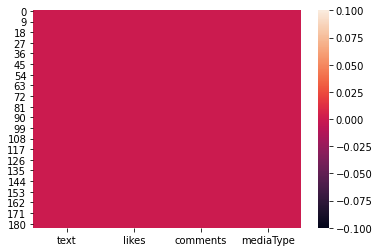

In [21]:
sns.heatmap(main_data.isnull())

In [22]:
main_data.text[4]

'Paper bags can be stronger and more resilient than you think, especially with the newest addition in our selection of #renewable and #recyclable materials for paper bags. Paper bags made with CarrEco Brown™ by Stora Enso are reliable shopping companions with great environmental benefits:👉 Through its unique three-layer structure, CarrEco Brown offers exceptional strength properties suitable for strong shopping bags. 👉Made from 100% fresh fibers, CarrEco Brown is a strong material with a natural look and feel, making it ideal especially for retail and takeaway bags.👉The material is also safe for direct food contact which makes it a great fit for takeaway food and groceries. https://hubs.li/Q016xNKq0'

In [23]:
main_data.describe()

,likes,comments
count,184.000000,184.000000
mean,190.255435,3.440217
std,131.972778,7.527488
min,1.000000,0.000000
25%,95.500000,0.000000
50%,162.500000,2.000000
75%,246.000000,4.000000
max,980.000000,88.000000


In [24]:
main_data[main_data.likes==980]

,text,likes,comments,mediaType
36,In addition to our recent decision to stop pro...,980,14,image


In [25]:
main_data.text[36]

"In addition to our recent decision to stop production, sales, imports and exports in Russia, Stora Enso is joining the extraordinary show of support from companies and individuals all around the world to support the Ukrainian people. In order to aid those who have been impacted and displaced by the conflict, Stora Enso will make an initial 100 000 EUR direct contribution to UNHCR, the UN Refugee Agency.“It is not enough for us to stand by. Our obligation as a responsible organization is to do what's right and provide support where possible,” Annica Bresky, CEO of Stora Enso."

In [26]:
main_data.sort_values('likes', ascending=False)

,text,likes,comments,mediaType
36,In addition to our recent decision to stop pro...,980,14,image
121,Our pilot plant for producing bio-based carbon...,750,24,image
11,We are committed to take action for women's eq...,595,9,video
70,“Our sales increased by 28% in our core busine...,525,12,video
166,Stora Enso and Vogue Scandinavia have won the ...,522,9,image
...,...,...,...,...
92,How can the forest sector contribute to a more...,33,2,image
113,Kesätyöhakumme on kiivaimmillaan! Osallistu en...,19,0,image
179,We're bringing a truly eco-friendly alternativ...,2,88,image
68,Stora Enso ensures a sustainable future for th...,1,12,image


In [27]:
main_data.text[121]

'Our pilot plant for producing bio-based carbon materials from lignin has started operations. Pilot production of Lignode® by Stora Enso, wood-based carbon for batteries, is currently being ramped up. By converting lignin separated from wood into carbon-based anode materials, the synthetic and non-renewable graphite material can be replaced. Read more: https://hubs.li/H0SL0XF0#biobased #renewablematerials'

### Most used words

In [28]:
words_used = []
for i in main_data.text:
    words_used.append(i.split())

In [29]:
words_list = []
for i in words_used:
    for word in i:
        words_list.append(word.lower())

In [30]:
words_list

['“it',
 'doesn’t',
 'really',
 'work',
 'with',
 'our',
 'brand',
 'to',
 'ship',
 'a',
 'paddle',
 'in',
 'plastic,',
 'we',
 'needed',
 'to',
 'find',
 'some',
 'other',
 'way”,',
 'says',
 'emil',
 'gyllenberg',
 'at',
 'melker',
 'of',
 'sweden',
 '–',
 'an',
 'outdoor',
 'hardware',
 'company',
 'working',
 'to',
 'change',
 'their',
 'industry',
 'to',
 'be',
 'sustainable.',
 'together',
 'with',
 'stora',
 'enso’s',
 'design',
 'team',
 'they',
 'created',
 'a',
 'paddle',
 'box',
 'free',
 'from',
 'fossil',
 'plastic.',
 'check',
 'it',
 'out.',
 '#packagingdesign',
 '#packagingsolutions',
 '#sustainablepackaging',
 '#outdoors',
 'our',
 'paper',
 'cup',
 'material',
 'is',
 'made',
 'from',
 'sustainably',
 'sourced',
 'fibers',
 'and',
 'it',
 'also',
 'supports',
 'paper',
 'cups’',
 '#circularity',
 '–',
 'designed',
 'for',
 '#recycling,',
 'ready',
 'for',
 'collection',
 'and',
 'sorting.',
 'we',
 'are',
 'working',
 'towards',
 'the',
 'eu',
 'action',
 'plan',
 'fo

In [31]:
word_count = Counter(words_list)

In [32]:
word_count.most_common()

[('the', 641),
 ('and', 465),
 ('to', 404),
 ('in', 305),
 ('of', 273),
 ('a', 252),
 ('for', 207),
 ('our', 188),
 ('is', 159),
 ('we', 127),
 ('are', 110),
 ('stora', 109),
 ('with', 99),
 ('by', 98),
 ('packaging', 97),
 ('on', 90),
 ('can', 81),
 ('that', 79),
 ('as', 78),
 ('at', 75),
 ('more', 75),
 ('from', 74),
 ('sustainable', 70),
 ('be', 68),
 ('new', 67),
 ('read', 66),
 ('how', 64),
 ('building', 62),
 ('about', 60),
 ('enso', 56),
 ('will', 54),
 ('this', 51),
 ('food', 50),
 ('materials', 49),
 ('an', 46),
 ('has', 44),
 ('sustainability', 41),
 ('it', 40),
 ('your', 39),
 ('#sustainability', 37),
 ('plastic', 37),
 ('climate', 36),
 ('more:', 36),
 ('paper', 35),
 ('have', 35),
 ('world', 35),
 ('–', 34),
 ('their', 34),
 ('you', 34),
 ('made', 30),
 ('report', 30),
 ('material', 29),
 ('make', 29),
 ('-', 29),
 ('renewable', 28),
 ('one', 28),
 ('but', 28),
 ('also', 26),
 ('circular', 26),
 ('wood', 26),
 ('help', 26),
 ('all', 25),
 ('need', 25),
 ('carbon', 25),
 ('

In [33]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
clean_wordlist = words_list




In [35]:
clean_wordlist
for word in clean_wordlist:
    if word in stopwords.words('english'):
        clean_wordlist.remove(word)

In [36]:
clean_wordlist

['“it',
 'doesn’t',
 'really',
 'work',
 'brand',
 'ship',
 'paddle',
 'plastic,',
 'needed',
 'find',
 'way”,',
 'says',
 'emil',
 'gyllenberg',
 'melker',
 'sweden',
 '–',
 'outdoor',
 'hardware',
 'company',
 'working',
 'change',
 'industry',
 'sustainable.',
 'together',
 'stora',
 'enso’s',
 'design',
 'team',
 'created',
 'paddle',
 'box',
 'free',
 'fossil',
 'plastic.',
 'check',
 'out.',
 '#packagingdesign',
 '#packagingsolutions',
 '#sustainablepackaging',
 '#outdoors',
 'paper',
 'cup',
 'material',
 'made',
 'sustainably',
 'sourced',
 'fibers',
 'also',
 'supports',
 'paper',
 'cups’',
 '#circularity',
 '–',
 'designed',
 '#recycling,',
 'ready',
 'collection',
 'sorting.',
 'working',
 'towards',
 'eu',
 'action',
 'plan',
 'circular',
 'economy,',
 'target',
 '85%',
 'paper-based',
 'packaging,',
 'including',
 'cups',
 'recycled',
 '2030.',
 'https://hubs.li/q017hsz_0',
 'purpose',
 'advance',
 'renewable',
 'materials',
 'agenda',
 'replace',
 'fossil',
 'based',
 'ma